In [2]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Define custom scoring function
def my_score(X, labels):
    return silhouette_score(X, labels=True)

from sklearn.metrics import mean_squared_error, mean_squared_log_error

!pip install pandas==1.5.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd gdrive/MyDrive/TxtAnalytics_Proj

searchMatrix = pd.read_pickle("X_Train_nonSuicidal.pkl")

Mounted at /content/gdrive
/content/gdrive/MyDrive/TxtAnalytics_Proj


In [2]:
#skip
stop_list = ("suicidal", "suicide", "aah", "fuck", "fucking", "na")
text_data = searchMatrix['text_lemmatized'].to_numpy()
text_data = [[w for w in doc if w not in stop_list] for doc in text_data]

text_data_lemmatized_joined = [' '.join(x) for x in text_data]  # joined to fit CountVectorizer
print(text_data_lemmatized_joined[:6])
#text_data_lemmatized_joined = delete_less_than_k(text_data_lemmatized_joined, 3)

#vectorizer = TfidfVectorizer(stop_words='english')
# Fit the vectorizer and transform the text data
#data_vectorized = vectorizer.fit_transform(text_data_lemmatized_joined)

#feature_names1 = vectorizer.get_feature_names_out()

['go adult year crazy friend viking feel birthday day earth like constant countdown july head know feel like big deal maybe cause parent let live date id able want approval surreal have hold have thing new dentist new doctor new chapter fact childhood think keep childhood make break hard try fix hard forgive people stop kid feel way stress college stuff right sleep', 'today birthday today birthday generally person do nt forget stuff easy forget someone birthday large friend group know birthdays heart know wish happy birthday day today wake get text sex girlfriend complicate get mental issue decide consider year abroad soon wish happy birthday happy sad time big deal friend birthdays gift outside wifi shuts cell reception wish happy birthday right day begin help fairly large streamer help best friend work present girlfriend want easy believe people forget pretty surprised talk good friend today live talk day past week school didst remember talk yesterday si room ask cake id feel like pe

In [5]:
#skip
import bertopic
from umap import UMAP
#from bertopic import Preprocessor
from bertopic import BERTopic
#from sklearn.manifold import TSNE

#preprocessor = Preprocessor(language='english')
#hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(top_n_words =15, umap_model=umap_model,
                       calculate_probabilities=True, 
                       verbose = False)
topics, probs = topic_model.fit_transform(text_data_lemmatized_joined)

#print(data_vectorized[:20][0:])
# Print the top words for each topic
#feature_names = vectorizer.get_feature_names_out()
#for topic_idx, topic in enumerate(NMF_model.components_):
#    top_words = [feature_names[i] for i in topic.argsort()[:-15 - 1:-1]]
#    print(f"Topic {topic_idx}: {', '.join(top_words)}")

#for topic_idx, topic in enumerate(NMF_model2.components_):
#    top_words = [feature_names[i] for i in topic.argsort()[:-15 - 1:-1]]
#    print(f"Topic {topic_idx}: {', '.join(top_words)}")



In [6]:
import joblib
import numpy as np
topic_model.save('bertTopic_non_suicdal_model.jl')
joblib.dump(probs, 'bertTopic_non_suicdal_probs.jl')
joblib.dump(topics, 'bertTopic_non_suicdal_topic.jl')


/usr/local/lib/python3.9/dist-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


['bertTopic_non_suicdal_topic.jl']

In [7]:
from sklearn.metrics import log_loss
import numpy as np

epsilon = 1e-8
log_perplexity = -1 * np.mean(np.log(np.sum(probs, axis=1) + epsilon))
perplexity = np.exp(log_perplexity)
print("Perplexity:", perplexity)

# compute log likelihood
log_likelihood = -1 * np.log(perplexity)
print("Log Likelihood:", log_likelihood)

Perplexity: 1.8135973260168419
Log Likelihood: -0.5953123458038545


In [10]:
# get top 10 topics
top_n_topics = 10
topic_freq = topic_model.get_topic_freq()
top_topics = topic_freq.nlargest(top_n_topics, 'Count')

# extract the topic IDs and top words
topic_ids = top_topics['Topic']
top_words = [topic_model.get_topic(topic_id)[:15] for topic_id in topic_ids]

# create a pandas dataframe with the top topics and top words
word_lists = []
for topic_id in topic_ids:
    words = topic_model.get_topic(topic_id)
    word_list = [word[0] for word in words[:15]]
    word_lists.append(word_list)

df_topic_keywords = pd.DataFrame(word_lists, columns=["Word "+str(i) for i in range(15)], 
                  index=["Topic "+str(i) for i in range(top_n_topics)])

print('The bertopic version is {}.'.format(bertopic.__version__))

df_topic_keywords

The bertopic version is 0.14.1.


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,school,like,feel,friend,know,time,talk,life,girl,want,live,think,thing,year,go
Topic 1,server,discord,game,craft,play,min,join,pc,link,gamers,ping,player,chat,mario,channel
Topic 2,song,music,playlist,listen,click,album,lyric,notify,rap,band,recommend,genre,clack,artist,favourite
Topic 3,filler,filer,text,miller,file,fuller,bore,award,title,fill,obligatory,filllerrrrrrrrrrrrrrr,post,fillet,chat
Topic 4,gay,trans,gender,straight,woman,men,sexuality,homophobic,bisexual,phobic,male,binary,mon,female,lesbian
Topic 5,sleep,goodnight,wake,asleep,bed,night,awake,morning,hour,schedule,fall,fighter,slept,stay,nap
Topic 6,crush,confess,ask,say,date,feeling,yes,reject,tell,friend,shes,liked,advice,girl,like
Topic 7,anime,movie,watch,netflix,yentai,episode,cuties,series,show,pedro,season,suggestion,recommendation,scene,titan
Topic 8,dog,cat,pet,kitten,doggy,prime,bark,vet,owner,stray,puppy,die,adopt,animal,cute
Topic 9,dad,parent,yell,father,divorce,mon,he,house,argue,bod,say,mad,sister,angry,child


In [ ]:
#topics, probs = topic_model.transform(text_data_lemmatized_joined)


In [10]:
# Prepare data for PyLDAVis
top_n = 10

topic_term_dists = topic_model.c_tf_idf_.toarray()[:top_n+1, ]
new_probs = probs[:, :top_n]
outlier = np.array(1 - new_probs.sum(axis=1)).reshape(-1, 1)
doc_topic_dists = np.hstack((new_probs, outlier))
doc_lengths = [len(doc) for doc in text_data]
vocab = [word for word in topic_model.vectorizer_model.vocabulary_.keys()]
term_frequency = [topic_model.vectorizer_model.vocabulary_[word] for word in vocab]



In [14]:
topic_term_dists_norm = topic_term_dists / (topic_term_dists.sum(axis=1, keepdims=True) + epsilon)
# find the rows in W_norm that do not sum up to 1
problematic_rows = np.where(np.abs(topic_term_dists_norm.sum(axis=1) - 1) > epsilon)[0]
topic_term_dists_norm[problematic_rows, :] = 1
# print the indices of the problematic rows
print("Problematic rows:", len(problematic_rows))

Problematic rows: 1


In [15]:
# create the pyLDAvis data
data = {'topic_term_dists': topic_term_dists_norm,
        'doc_topic_dists': doc_topic_dists,
        'doc_lengths': doc_lengths,
        'vocab': vocab,
        'term_frequency': term_frequency}

In [ ]:
!pip install pyldavis pyLDAvis==3.4.0
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [37]:
print('The pyLDAvis-learn version is {}.'.format(pyLDAvis.__version__))
# Visualize using pyLDAvis
panel= pyLDAvis.prepare(**data, mds='tsne')
panel

The pyLDAvis-learn version is 3.4.0.


/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
10    -60.994576 -24.494513       1        1  96.176738
2      10.322225  -1.911128       2        1   1.217007
0      10.429334 -50.843658       3        1   0.518926
1     -24.700499  13.477337       4        1   0.504959
3     -33.282455 -61.190964       5        1   0.356309
8     -34.659103  52.473644       6        1   0.282518
5     -64.699715  17.328278       7        1   0.220799
6      43.452702 -24.895475       8        1   0.207839
7     -20.464895 -23.460859       9        1   0.197076
4      43.484653  21.226450      10        1   0.181349
9       7.153528  42.858547      11        1   0.136478, topic_info=               Term           Freq          Total Category  logprob  loglift
2301      backwater  143607.000000  143607.000000  Default  30.0000  30.0000
11006        falcon   36780.000000   36780.000000  Default  29.0000  29.0000
5409          rainy   33340.000000   33340.000000  Default  28.0000  28.0000
23202  mphampxblook   23688.000000   23688.000000  Default  27.0000  27.0000
5537     soonampxbi   23804.000000   23804.000000  Default  26.0000  26.0000
...             ...            ...            ...      ...      ...      ...
8061         unload       3.750754    5824.373071  Topic11  -6.2228   4.0707
1482          racer       3.523395    5583.274979  Topic11  -6.2853   4.0505
30535         brash       3.539850    5764.063802  Topic11  -6.2807   4.0233
30785      schwartz       3.443210    6158.418244  Topic11  -6.3083   3.9294
4387         trumps       3.403437    6250.653113  Topic11  -6.3200   3.9029

[408 rows x 6 columns], token_table=       Topic      Freq                                      Term
term                                                            
26611      1  0.087305         aaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhh
26611      2  0.001103         aaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhh
26611      3  0.000735         aaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhh
26611      4  0.000184         aaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhh
26611      5  0.907238         aaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhh
...      ...       ...                                       ...
18406      9  0.000462  youtubehttpswwwyoutubecomwatchvubigimurq
18406     10  0.000308  youtubehttpswwwyoutubecomwatchvubigimurq
18406     11  0.000462  youtubehttpswwwyoutubecomwatchvubigimurq
30292      1  0.671381                                      zine
30292      5  0.328568                                      zine

[2084 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 3, 1, 2, 4, 9, 6, 7, 8, 5, 10])

In [38]:
pyLDAvis.save_html(panel, 'bert_Nonsuicidal.html')

In [21]:
# Construct the k-means clusters
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD


clusters = KMeans(n_clusters=10, random_state=100).fit_predict(topic_term_dists)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(topic_term_dists)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Perc of Variance Explained: 
 [0.37 0.06]


Text(0.5, 1.0, 'Segregation of Topic Clusters')

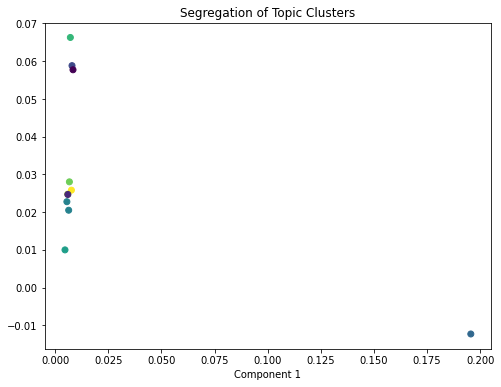

In [22]:
import matplotlib.pyplot as plot

plot.figure(figsize=(8,6))
plot.scatter(x, y, c=clusters)
plot.xlabel('Component 2')
plot.xlabel('Component 1')
plot.title("Segregation of Topic Clusters", )

In [34]:
from gensim.models import CoherenceModel
import gensim.corpora as corpora

def get_Cv(model, df_column):
  documents = pd.DataFrame({"Document": df_column,
                          "ID": range(len(df_column)),
                          "Topic": topics})
  documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
  cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

  # Extract vectorizer and analyzer from BERTopic
  vectorizer = topic_model.vectorizer_model
  analyzer = vectorizer.build_analyzer()

  # Extract features for Topic Coherence evaluation
  words = vectorizer.get_feature_names_out()
  tokens = [analyzer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!=''] 
                for topic in range(len(set(topics))-1)]


  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words, 
                                  texts=tokens, 
                                  corpus=corpus,
                                  dictionary=dictionary, 
                                  coherence='c_v')
  return coherence_model.get_coherence()

In [35]:
coherence = get_Cv(df_column=text_data_lemmatized_joined, model=topic_model)

In [40]:
print(coherence)

0.5566895623670213


# Prediction here

In [77]:
import bertopic
import pandas as pd
from bertopic import BERTopic
import joblib
topic_model = BERTopic.load('bertTopic_non_suicdal_model.jl')
probs = joblib.load('bertTopic_non_suicdal_probs.jl')
topics = joblib.load('bertTopic_non_suicdal_topic.jl')


In [79]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(topic_model.get_topic_freq())
# Assign Column and Index
df_topic_keywords.columns = ["Count", "Keywords"]
topicnames = ["Topic" + str(i) for i in range(len(df_topic_keywords))]
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,Count,Keywords
Topic0,-1,26721
Topic1,0,1655
Topic2,1,1532
Topic3,2,1209
Topic4,3,1087


In [34]:
# get top 10 topics
top_n_topics = 10
topic_freq = topic_model.get_topic_freq()
top_topics = topic_freq.nlargest(top_n_topics, 'Count')

# extract the topic IDs and top words
topic_ids = top_topics['Topic']
top_words = [topic_model.get_topic(topic_id)[:15] for topic_id in topic_ids]

# create a pandas dataframe with the top topics and top words
word_lists = []
for topic_id in topic_ids:
    words = topic_model.get_topic(topic_id)
    word_list = [word[0] for word in words[:15]]
    word_lists.append(word_list)

df_topic_keywords = pd.DataFrame(word_lists, columns=["Word "+str(i) for i in range(15)], 
                  index=["Topic "+str(i) for i in range(top_n_topics)])

print('The bertopic version is {}.'.format(bertopic.__version__))

df_topic_keywords

The bertopic version is 0.14.1.


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,school,like,feel,friend,know,time,talk,life,girl,want,live,think,thing,year,go
Topic 1,server,discord,game,craft,play,min,join,pc,link,gamers,ping,player,chat,mario,channel
Topic 2,song,music,playlist,listen,click,album,lyric,notify,rap,band,recommend,genre,clack,artist,favourite
Topic 3,filler,filer,text,miller,file,fuller,bore,award,title,fill,obligatory,filllerrrrrrrrrrrrrrr,post,fillet,chat
Topic 4,gay,trans,gender,straight,woman,men,sexuality,homophobic,bisexual,phobic,male,binary,mon,female,lesbian
Topic 5,sleep,goodnight,wake,asleep,bed,night,awake,morning,hour,schedule,fall,fighter,slept,stay,nap
Topic 6,crush,confess,ask,say,date,feeling,yes,reject,tell,friend,shes,liked,advice,girl,like
Topic 7,anime,movie,watch,netflix,yentai,episode,cuties,series,show,pedro,season,suggestion,recommendation,scene,titan
Topic 8,dog,cat,pet,kitten,doggy,prime,bark,vet,owner,stray,puppy,die,adopt,animal,cute
Topic 9,dad,parent,yell,father,divorce,mon,he,house,argue,bod,say,mad,sister,angry,child


In [74]:
# Further reduce topics
topic_model.reduce_topics(text_data_lemmatized_joined, nr_topics=10)

In [70]:
#!spacy download en_core_web_sm
import gensim
import numpy as np

# Define function to predict topic for a given text document.
#!pip install -U spacy
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def predict_topic(model, vectorizer, text):

    if len(text) == 0:
      return None, -1
    else:
      global sent_to_words
      global lemmatization
      
      # Step 1: Clean with simple_preprocess
      mytext_2 = list(sent_to_words(text))
      # Step 2: Lemmatize
      mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
      
      # Step 3: Transform
      topics, topic_probability_scores = model.transform(mytext_3)
      
      # Step 5: Infer Topic
      # Get the topic with the highest probability for each document
      top_topics = np.argmax(topic_probability_scores, axis=1)

      # Map topic IDs to topic labels
      topic_labels = model.get_topic_freq().Topic.to_dict()

      # Get the topic labels for each document
      topic_labels = [topic_labels.get(topic_id) for topic_id in top_topics]

      # Print the topic labels for each document
      infer_topicNo = topic_labels[0]
      topic_words = model.get_topic(topic=infer_topicNo)
      word_lists = []
      for w in topic_words:
          word_lists.append(w[0])

      topic = word_lists
      #print (topic)
      #for i, text in enumerate(text):
      #    print(f"Document {i}: nTopic: {topic_labels[i]}")
      return topic, infer_topicNo


In [78]:
mytext = ["""
Baa, baa, black sheep,
Have you any cotton? 
Yes, sir, yes, sir,
Three bags full;
One for my master,
One for my dame,
And one for the little boy
Who lives down the lane.
         """]

topic, infer_topicNo = predict_topic(topic_model, vectorizer = topic_model.vectorizer_model, text = mytext)

print("Topic: " + str(infer_topicNo) )
print(topic)

Topic: 14
['car', 'driver', 'drive', 'permit', 'road', 'license', 'bike', 'bus', 'truck', 'speed', 'test', 'engine', 'ride', 'park', 'lane']
